In [1]:
import pandas as pd
import sweetviz as sv
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()
# nltk.download('stopwords')

In [2]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [3]:
df = pd.read_csv("preprocessed_nto_to.csv")

In [4]:
df = df.drop(columns = ['created_utc','local_time_minute','local_time_second'])

In [5]:
df.title = df.title.replace('\s+', ' ', regex=True)
df.post_body = df.post_body.replace('\s+', ' ', regex=True)
df.author = df.author.replace('\s+', ' ', regex=True)

### Language

In [6]:
import langdetect 


In [7]:
df['lang'] = df["post_body"].apply(lambda x: langdetect.detect(x) if 
                                 x.strip() != "" else "")

In [8]:
df = df[df["lang"]=="en"]

In [9]:
df = df.drop(columns = ['lang'])

### stop words

In [10]:
df['post_body_stop'] = df['post_body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [11]:
df.head()

,title,post_body,author,num_comments,score,label,local_time_year,local_time_month,local_time_day,local_time_hour,post_body_stop
0,parents forced to explain thrill of having sex...,san diego instructing their confused year old ...,kremor,0,1,1,2022,2,20,19,san diego instructing confused year old point ...
1,posh restaurant has cucumber slices floating i...,posh restaurant has cucumber slices floating i...,el zarco,0,1,1,2022,2,19,9,posh restaurant cucumber slices floating jug h...
2,painted rocksnail knows it really fucked if an...,wolf creek al reacting with dismay to news tha...,sanlear,0,1,1,2022,2,19,6,wolf creek al reacting dismay news beloved mar...
3,why has the onion gotten so much worse recen,why has the onion gotten so much worse recen,additional barber,1,1,1,2022,2,18,14,onion gotten much worse recen
4,boar s head unveils new funfetti birthday ham,sarasota fl in a statement that confirmed cust...,heavylobster,0,1,1,2022,2,17,20,sarasota fl statement confirmed customers turn...


In [12]:
df['post_body'][0]

'san diego instructing their confused year old not to point or stare at the primates at the san diego zoo local parents jen and mark haskell were reportedly forced to explain the thrill of having sex in public to their daughter wednesday after a pair of monkeys started mating in front of them honey right now the mommy monkey and the daddy monkey are making a baby and they really really like that we re watching them said mother jen haskell adding that the male monkey who then proceeded to scream growl and mount his female companion was clearly an exhibitionist who got off on the spectacle of it all i know it might not make sense but deep down these monkeys want you to laugh scream or take pictures of them because it all plays into their complex psychosexual game sometimes vanilla stuff just isn t enough for a mommy and daddy monkey anymore and doing it in front of a crowd of a couple dozen unsuspecting families in a public area is the only thing that will get them to feel true sexual pl

In [13]:
df['post_body_stop'][0]

'san diego instructing confused year old point stare primates san diego zoo local parents jen mark haskell reportedly forced explain thrill sex public daughter wednesday pair monkeys started mating front honey right mommy monkey daddy monkey making baby really really like watching said mother jen haskell adding male monkey proceeded scream growl mount female companion clearly exhibitionist got spectacle know might make sense deep monkeys want laugh scream take pictures plays complex psychosexual game sometimes vanilla stuff enough mommy daddy monkey anymore front crowd couple dozen unsuspecting families public area thing get feel true sexual pleasure anymore haskell also explained daughter totally acceptable explore scat play partner monkeys simply throwing feces stressed'

### Tpken

In [14]:
import nltk
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['post_body_stop']), axis=1)

In [15]:
df['tokenized_sents']

0        [san, diego, instructing, confused, year, old,...
1        [posh, restaurant, cucumber, slices, floating,...
2        [wolf, creek, al, reacting, dismay, news, belo...
3                      [onion, gotten, much, worse, recen]
4        [sarasota, fl, statement, confirmed, customers...
                               ...                        
31199    [stellan, skarsg, rd, dune, warner, bros, baro...
31200    [donald, trump, jr, selling, shirts, web, site...
31201    [donald, trump, jr, begun, selling, merchandis...
31202    [donald, trump, jr, begun, selling, merchandis...
31203    [last, week, horrifying, tragedy, occurred, se...
Name: tokenized_sents, Length: 30948, dtype: object

### Stemming

In [16]:
from nltk.stem.snowball import SnowballStemmer

In [17]:
stemmer = SnowballStemmer("english")

In [18]:
df['stemmed'] = df['tokenized_sents'].apply(lambda x: [stemmer.stem(y) for y in x])

In [19]:
df['stemmed'][0]

['san',
 'diego',
 'instruct',
 'confus',
 'year',
 'old',
 'point',
 'stare',
 'primat',
 'san',
 'diego',
 'zoo',
 'local',
 'parent',
 'jen',
 'mark',
 'haskel',
 'report',
 'forc',
 'explain',
 'thrill',
 'sex',
 'public',
 'daughter',
 'wednesday',
 'pair',
 'monkey',
 'start',
 'mate',
 'front',
 'honey',
 'right',
 'mommi',
 'monkey',
 'daddi',
 'monkey',
 'make',
 'babi',
 'realli',
 'realli',
 'like',
 'watch',
 'said',
 'mother',
 'jen',
 'haskel',
 'ad',
 'male',
 'monkey',
 'proceed',
 'scream',
 'growl',
 'mount',
 'femal',
 'companion',
 'clear',
 'exhibitionist',
 'got',
 'spectacl',
 'know',
 'might',
 'make',
 'sens',
 'deep',
 'monkey',
 'want',
 'laugh',
 'scream',
 'take',
 'pictur',
 'play',
 'complex',
 'psychosexu',
 'game',
 'sometim',
 'vanilla',
 'stuff',
 'enough',
 'mommi',
 'daddi',
 'monkey',
 'anymor',
 'front',
 'crowd',
 'coupl',
 'dozen',
 'unsuspect',
 'famili',
 'public',
 'area',
 'thing',
 'get',
 'feel',
 'true',
 'sexual',
 'pleasur',
 'anymor',


In [20]:
df['word_count'] = df["stemmed"].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df["stemmed"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df['avg_word_length'] = df['char_count'] / df['word_count']


In [21]:
df.head()

,title,post_body,author,num_comments,score,label,local_time_year,local_time_month,local_time_day,local_time_hour,post_body_stop,tokenized_sents,stemmed,word_count,char_count,avg_word_length
0,parents forced to explain thrill of having sex...,san diego instructing their confused year old ...,kremor,0,1,1,2022,2,20,19,san diego instructing confused year old point ...,"[san, diego, instructing, confused, year, old,...","[san, diego, instruct, confus, year, old, poin...",112,936,8.357143
1,posh restaurant has cucumber slices floating i...,posh restaurant has cucumber slices floating i...,el zarco,0,1,1,2022,2,19,9,posh restaurant cucumber slices floating jug h...,"[posh, restaurant, cucumber, slices, floating,...","[posh, restaur, cucumb, slice, float, jug, han...",8,64,8.000000
2,painted rocksnail knows it really fucked if an...,wolf creek al reacting with dismay to news tha...,sanlear,0,1,1,2022,2,19,6,wolf creek al reacting dismay news beloved mar...,"[wolf, creek, al, reacting, dismay, news, belo...","[wolf, creek, al, react, dismay, news, belov, ...",129,1041,8.069767
3,why has the onion gotten so much worse recen,why has the onion gotten so much worse recen,additional barber,1,1,1,2022,2,18,14,onion gotten much worse recen,"[onion, gotten, much, worse, recen]","[onion, gotten, much, wors, recen]",5,40,8.000000
4,boar s head unveils new funfetti birthday ham,sarasota fl in a statement that confirmed cust...,heavylobster,0,1,1,2022,2,17,20,sarasota fl statement confirmed customers turn...,"[sarasota, fl, statement, confirmed, customers...","[sarasota, fl, statement, confirm, custom, tur...",101,865,8.564356


In [22]:
df.shape

(30948, 16)

In [24]:
#Lemmatization
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['tokenized_sents'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x])
df.to_csv('nlp_processed_nto_to.csv', index = False)

df['lemmatized'][0]

['san',
 'diego',
 'instructing',
 'confused',
 'year',
 'old',
 'point',
 'stare',
 'primate',
 'san',
 'diego',
 'zoo',
 'local',
 'parent',
 'jen',
 'mark',
 'haskell',
 'reportedly',
 'forced',
 'explain',
 'thrill',
 'sex',
 'public',
 'daughter',
 'wednesday',
 'pair',
 'monkey',
 'started',
 'mating',
 'front',
 'honey',
 'right',
 'mommy',
 'monkey',
 'daddy',
 'monkey',
 'making',
 'baby',
 'really',
 'really',
 'like',
 'watching',
 'said',
 'mother',
 'jen',
 'haskell',
 'adding',
 'male',
 'monkey',
 'proceeded',
 'scream',
 'growl',
 'mount',
 'female',
 'companion',
 'clearly',
 'exhibitionist',
 'got',
 'spectacle',
 'know',
 'might',
 'make',
 'sense',
 'deep',
 'monkey',
 'want',
 'laugh',
 'scream',
 'take',
 'picture',
 'play',
 'complex',
 'psychosexual',
 'game',
 'sometimes',
 'vanilla',
 'stuff',
 'enough',
 'mommy',
 'daddy',
 'monkey',
 'anymore',
 'front',
 'crowd',
 'couple',
 'dozen',
 'unsuspecting',
 'family',
 'public',
 'area',
 'thing',
 'get',
 'feel',

In [25]:
#Create Tf-idf model

from sklearn.feature_extraction.text import TfidfVectorizer

#create a dummy function to return text as the text is already tokenized.
def dummy(doc):
    return doc

#Setting min_df and max_df removes unnecessary words.
vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy,
    preprocessor = dummy,
    token_pattern = str,
    min_df = 0.01,
    max_df = 0.8)

In [26]:
#For Classification 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

#Train and test
X=df['lemmatized']
y=df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [27]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_train_vectorized = pd.DataFrame(X_train_vectorized.toarray(), columns = vectorizer.get_feature_names())

X_test_vectorized = vectorizer.transform(X_test)

In [28]:
print(X_train_vectorized.head())

   ability      able  absolute  absolutely  abuse  academic  accept  accepted  \
0      0.0  0.000000       0.0    0.000000    0.0       0.0     0.0  0.115322   
1      0.0  0.000000       0.0    0.000000    0.0       0.0     0.0  0.000000   
2      0.0  0.000000       0.0    0.000000    0.0       0.0     0.0  0.000000   
3      0.0  0.009330       0.0    0.000000    0.0       0.0     0.0  0.000000   
4      0.0  0.022254       0.0    0.028388    0.0       0.0     0.0  0.000000   

    access  accident  ...  yes  yesterday       yet  york  young  younger  \
0  0.00000       0.0  ...  0.0        0.0  0.000000   0.0    0.0      0.0   
1  0.00000       0.0  ...  0.0        0.0  0.000000   0.0    0.0      0.0   
2  0.00000       0.0  ...  0.0        0.0  0.000000   0.0    0.0      0.0   
3  0.00562       0.0  ...  0.0        0.0  0.004833   0.0    0.0      0.0   
4  0.00000       0.0  ...  0.0        0.0  0.000000   0.0    0.0      0.0   

   youth  youtube  zero  zone  
0    0.0      0.0 

In [29]:
#Random forest model
rf = RandomForestClassifier()

#Fit model
rf.fit(X_train_vectorized, y_train)

#Get Scores
print('CV Score:', cross_val_score(rf, X_train_vectorized, y_train))
print('Training Accuracy:', rf.score(X_train_vectorized, y_train))
print('testing Accuracy:', rf.score(X_test_vectorized, y_test))

CV Score: [0.94830928 0.95131409 0.93946575 0.94506678 0.94205084]
Training Accuracy: 0.9975873508250398
testing Accuracy: 0.9446814010598423


In [30]:
#naive bayes model
nb = MultinomialNB()

#Fit model
nb.fit(X_train_vectorized, y_train)

#Get Scores
print('CV Score:', cross_val_score(nb, X_train_vectorized, y_train))
print('Training Accuracy:', nb.score(X_train_vectorized, y_train))
print('testing Accuracy:', nb.score(X_test_vectorized, y_test))


CV Score: [0.87249623 0.86600603 0.8789315  0.86665231 0.86772943]
Training Accuracy: 0.8772564732239024
testing Accuracy: 0.8702339408039291


In [31]:
#Logistic regression Model
lr = LogisticRegression(solver='liblinear')

#Fit model
lr.fit(X_train_vectorized, y_train)

#Get Scores
print('CV Score:', cross_val_score(lr, X_train_vectorized, y_train))
print('Training Accuracy:', lr.score(X_train_vectorized, y_train))
print('testing Accuracy:', lr.score(X_test_vectorized, y_test))


CV Score: [0.94077105 0.94312796 0.93278759 0.94226626 0.93580353]
Training Accuracy: 0.9557537374520702
testing Accuracy: 0.9431304123045108


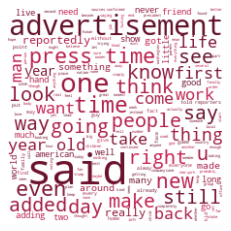

In [32]:
#Creating Wordcloud
from wordcloud import WordCloud
from PIL import Image

def generateWC(text,cc):
    def monochromatic_style(color_choice=cc, Word=None, font_size=None, position=None, 
                       orientation=None, font_path=None, random_state=None):
        if(cc=='red'):
            h = 343 
        elif(cc=='green'):
            h=110 
        s = 70 
        l = int(100.0 * float(random_state.randint(60,120))/255.0) 
        return "hsl({}, {}%, {}%)".format(h,s,l)

    mask = np.array(Image.open('reddit.png'))

    wc = WordCloud(max_words = 2000,
                  random_state = 42,
                  mask = mask,
                  background_color="white",
                  width = mask.shape[1],
                  height = mask.shape[0],
                  color_func = monochromatic_style,)
    wc.generate(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()

#Create TheOnion text for wordcloud 
full_body = " ".join(body for body in df.loc[df['label']==1, 'post_body_stop'])
generateWC(full_body,'red')

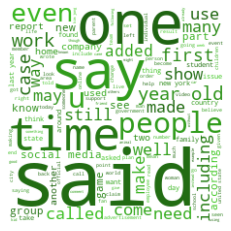

In [33]:
#Create NotTheOnion text for wordcloud 
full_body = " ".join(body for body in df.loc[df['label']==0, 'post_body_stop'])
generateWC(full_body, 'green')